In [1]:
import numpy as np

# Generate the innovations of the time series (an MxT)
M, T = 5, 250
procs = np.random.normal(size=(M,T))

# Introduce first-order AR dependence on the innovations
def make_ar(x):
    for i in range(1,len(x)):
        x[i] += 0.5 * x[i-1]

make_ar(procs[0])
for i in range(1,M):
    procs[i][1:] += 0.25 * procs[i-1][:-1] # Add a time-lagged dependence onto the observations
    make_ar(procs[i])

[Text(0.5, 69.0, 'Process'), Text(678.1249999999999, 0.5, 'Time')]

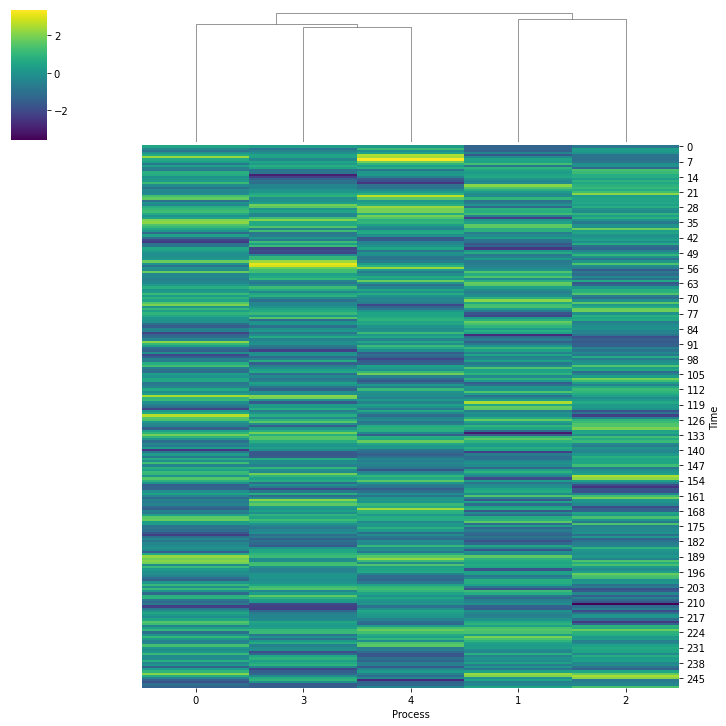

In [3]:
# Load the Data class
from pyspi.data import Data
import seaborn as sns

#   - dim_order specifies processes is the first dimension and samples/observations are the second
#   - normalise z-scores the data
data = Data(procs, dim_order='ps', normalise=True)

dat = data.to_numpy(squeeze=True)

g = sns.clustermap(np.transpose(dat),
                    cmap='viridis', figsize=(10,10),
                    col_cluster=True, row_cluster=False)
ax_im = g.ax_heatmap

ax_im.set(xlabel='Process', ylabel='Time')

In [ ]:
# Load the Calculator class
from pyspi.calculator import Calculator

# Let's create an unnamed calculator
calc = Calculator(dataset=data,name='demo')

In [ ]:
calc.compute()

In [ ]:
# Should be an adjacency matrix of features x processes x processes
print(calc.adjacency.shape)

calc.prune()

print(calc.adjacency.shape)

In [ ]:
import matplotlib.pyplot as plt

# Correlate all the features
corrmat = calc.flatten().corr(method='spearman')

# corrmat.dropna(axis=0,thres=0.2*corrmat.shape[0]).dropna(axis=1,thres=0.2*corrmat.shape[0])

sns.set(font_scale=0.3)
g = sns.clustermap(corrmat.fillna(0), mask=corrmat.isna(),
                    center=0.0,
                    cmap='RdYlBu_r',
                    xticklabels=1, yticklabels=1 )

plt.setp(g.ax_heatmap.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.show()

In [ ]:
from pyspi.calculator import CorrelationFrame

cf = CorrelationFrame(calc)

fm = cf.get_feature_matrix()

sns.heatmap(fm,cmap='RdYlBu_r',yticklabels=calc.n_statistics)

plt.show()